In [31]:
# 데이터 로드
import pandas as pd
DATA_PATH = "/content/sample_data/"
train = pd.read_csv(f'{DATA_PATH}train.csv')
test = pd.read_csv(f'{DATA_PATH}test.csv')
sample_submission = pd.read_csv(f'{DATA_PATH}/sample_submission.csv')

In [32]:
# 데이터 확인(출력여부)
train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [33]:
# 데이터 확인(칼럼수)
train.shape, test.shape

((10000, 15), (10000, 14))

In [34]:
# 데이터 확인(데이터 종류)
train.info()
# 결측치 없어서 skip
# print(train.isna().sum())
# print(test.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [35]:
# 타겟 drop
train = train.drop(['target'], axis=1)
train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0


In [36]:
# 수치형 및 범주형 변수 구분
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64'] and col not in ['target']]
categorical_cols = [col for col in train.columns if train[col].dtype == 'object' and col not in ['user_id']]

In [37]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 스케일링을 위한 StandardScaler 인스턴스 생성
scaler = StandardScaler()

# 수치형 데이터에 대해 스케일링 적용
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])

# 레이블 인코딩을 위한 LabelEncoder 인스턴스 생성 및 적용
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    train[col] = label_encoders[col].fit_transform(train[col])
    test[col] = label_encoders[col].transform(test[col])

# 전처리 후 학습 데이터 확인
train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,b919c29d,0.167046,-0.121165,-0.015962,-0.829869,0.786885,1.038128,-0.669045,-0.024844,0.090246,1,0,1.400157,0.647774
1,a0a60abb,0.621553,0.357181,1.152389,0.316456,0.498363,0.212579,2.261009,-0.594656,-0.702077,2,0,-0.711163,1.080460
2,b9f171ae,1.530566,-1.675788,0.400155,-0.591616,0.065581,0.487762,1.939124,-0.024844,0.090246,2,1,-1.414937,1.513146
3,5dc0ba8b,-1.650980,0.476767,0.877690,-0.218820,0.931145,1.588495,-0.489192,-1.734280,-0.702077,1,0,-0.711163,-1.515656
4,65c83654,-1.196473,-1.197443,2.130972,-0.431503,0.931145,-0.612970,0.691049,-0.594656,0.090246,2,0,0.696384,-1.515656


In [38]:
# 모델 학습
from sklearn.model_selection import train_test_split

# 특성과 타겟 변수 분리
X = train.drop(columns=['user_id', 'subscription_type'])  # user_id는 제외하고 특성 데이터로 사용
y = train['subscription_type']

# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

In [39]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=12)
model.fit(X_train, y_train)
pred = model.predict(X_val)

In [40]:
# 다중 클래스 분류 평가 리포트 micro 평균 적용
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_val, pred)
precision = precision_score(y_val, pred, average='micro')
recall = recall_score(y_val, pred)
roc_auc = roc_auc_score(y_val, pred, average='micro')
f1 = f1_score(y_val, pred, average='macro')
roc_auc = roc_auc_score(y_val, pred, multi_class='ovr', average='micro')
report = classification_report(y_val, pred)

print("정확도:", accuracy)
print("정밀도:", precision)
print("재현율:", recall)
print("ROC AUC:", roc_auc)
print("F1 스코어:", f1)
print("분류 리포트:\n", report)

정확도: 0.6955
정밀도: 0.6955
재현율: 0.6206467661691543
ROC AUC: 0.6832330820812326
F1 스코어: 0.6832703557955674
분류 리포트:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1196
           1       0.62      0.62      0.62       804

    accuracy                           0.70      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.70      0.70      0.70      2000



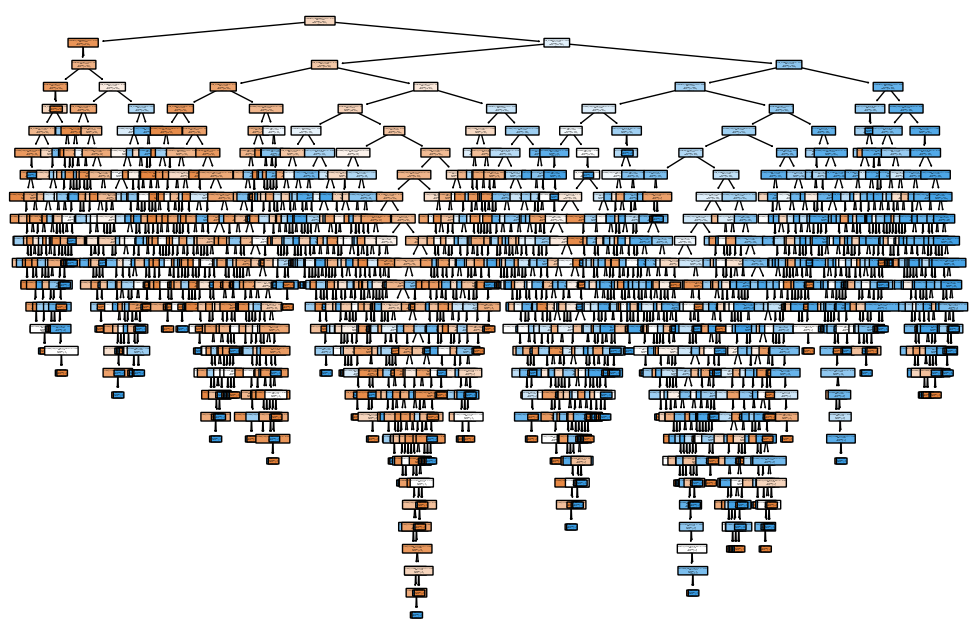

In [47]:
# 클래스 레이블을 그림 표시를 위한 문자열로 변환 (TypeError 방지)
class_names_str = [str(class_label) for class_label in model.classes_]

# Decision Tree 시각화
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=class_names_str, rounded=True)
plt.show()

# 유효성 검사
pred = model.predict(X_val)